## Imports

In [1]:
import pandas as pd
import my_functions as utils

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

import umap.umap_ as umap


/home/arthur/venv/tcc-env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-03-29 18:25:33.001134: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-29 18:25:33.140419: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-29 18:25:33.284139: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743283533.458585    6266 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743283533.506312    6266 cuda_blas.cc:1418] Un

## Carregando Dados

In [2]:
df = pd.read_pickle('params/data/df_exp.pkl')
df.head()

,site,data_coleta,titulo,link,endereco,cidade,bairro,aluguel,condominio,iptu,...,longitude,regiao,area_bairro,qtd_homens,qtd_mulheres,total,qtd_domicilios_particulares,renda_media_responsaveis_domicilio,area_media_por_domicilio_particular,preco_m2_por_bairro
0,Cilar,2024-02-21,Apartamento com 1 quarto,https://cilar.com.br/alugar/apartamento-com-1-...,"AV JOAO GUALBERTO, 473 - ALTO DA GLORIA - Curi...",Curitiba,alto da gloria,1750.0,673.0,92.0,...,-49.266471,Matriz,0.88,2513,3075,5588,2125,3263.47,0.000414,36.350384
1,Cilar,2024-02-21,Apartamento com 3 quartos,https://cilar.com.br/alugar/apartamento-com-3-...,"AV PRESIDENTE KENNEDY, 3486 - AGUA VERDE - Cur...",Curitiba,agua verde,2400.0,575.0,143.0,...,-49.287091,Fazendinha-Portão,4.76,22546,27320,49866,17045,3332.57,0.000279,30.128985
2,Cilar,2024-02-21,Apartamento com 3 quartos,https://cilar.com.br/alugar/apartamento-com-3-...,"TV FREI CANECA, 11 - CENTRO - Curitiba",Curitiba,centro,2500.0,640.0,80.0,...,-49.272118,Matriz,3.30,13961,18662,32623,14576,2221.51,0.000226,37.852443
3,Cilar,2024-02-21,Apartamento com 2 quartos,https://cilar.com.br/alugar/apartamento-com-2-...,"Avenida Monteiro Tourinho, 788 - Tingui - Curi...",Curitiba,tingui,2500.0,500.0,132.0,...,-49.218512,Boa Vista,2.11,5496,6068,11654,3495,1615.47,0.000604,29.873823
4,Cilar,2024-02-21,Apartamento no 3º andar com 2 quartos,https://cilar.com.br/alugar/apartamento-no-3-a...,"Rua Paraguai, 586 - Bacacheri - Curitiba",Curitiba,bacacheri,2225.0,420.0,0.0,...,-49.235948,Boa Vista,6.98,10762,12344,23106,7107,3029.00,0.000982,31.774608


## Seleção de Features

In [3]:
features = ['area', 'quartos', 'suites','banheiros', 'vagas_garagem' ]

## Preparação dos Dados

In [4]:
dict_preparation = {
    'area': 'standart_scaler',
    'quartos': 'standart_scaler',
    'suites': 'standart_scaler',
    'banheiros': 'standart_scaler',
    'vagas_garagem': 'standart_scaler',
    'mobiliado': 'dummie_encode',
    'piscina': 'dummie_encode',
    'academia': 'dummie_encode',
    'sacada': 'dummie_encode',
    'churrasqueira': 'dummie_encode',
    'salao_de_festas': 'dummie_encode',
    'latitude': 'standart_scaler',
    'longitude': 'standart_scaler',
    'renda_media_responsaveis_domicilio':'standart_scaler'
}

df_transformed = utils.preparacao_dos_dados(df=df, dict_preparation=dict_preparation, is_train=True)

## Fine Tuning

### KMeans

#### Within-Cluster Sum of Square (WSS)

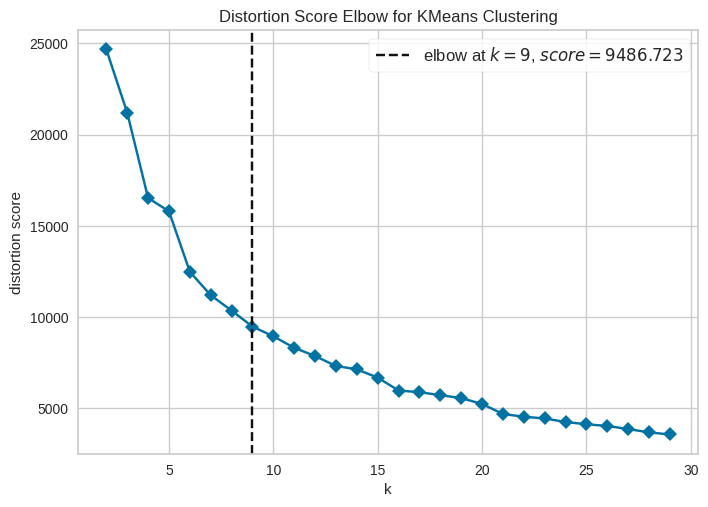

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [5]:
# Criando o modelo KMeans
kmeans = KMeans(random_state=42)

clusters = [i for i in range(2, 30)]

# Criando o gráfico do método do cotovelo
visualizer = KElbowVisualizer(kmeans, k=clusters, timings=False)
visualizer.fit(df_transformed[features])
visualizer.show()

#### Silhouette Score (SS)

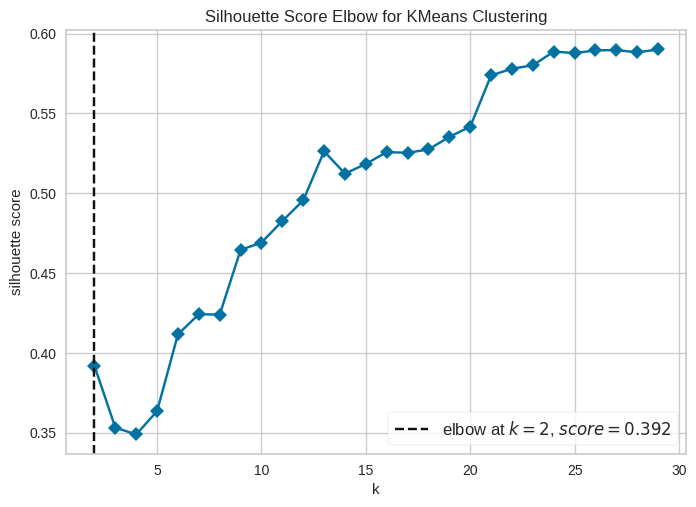

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [6]:
# Criando o modelo KMeans
kmeans = KMeans(random_state=42)

clusters = [i for i in range(2, 30)]

# Criando o gráfico do método do cotovelo
visualizer = KElbowVisualizer(kmeans, k=clusters, metric= 'silhouette', timings=False)
visualizer.fit(df_transformed[features])
visualizer.show()

#### Silhouette Analysis

In [7]:
# fig, ax = plt.subplots(7,2,figsize=(50,20))
# for k in clusters:
#     kn = KMeans(n_clusters = k, init = 'random', n_init=10, max_iter=100, random_state=42)
    
#     q, mod = divmod(k,2)
#     visualizer = SilhouetteVisualizer(kn, color='yellowbrick',ax=ax[q-1,mod])
#     visualizer.fit(df_transformed[features])
#     visualizer.finalize()
#     plt.tight_layout()

### DBSCAN

In [24]:
list_eps = [0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 2.8, 3]
list_min_samples = [5, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
df_silhouettes = pd.DataFrame()

for eps in list_eps:
    for min_samples in list_min_samples:

c

        df_aux = pd.DataFrame(
            {
                'eps': eps,
                'min_samples': min_samples,
                'silhouette_score': silhouette
            }, index=[0]
        )

        df_silhouettes = pd.concat([df_silhouettes, df_aux], axis =0 )

In [38]:
pd.pivot(data=df_silhouettes, columns=['min_samples'],index=['eps'], values=['silhouette_score'] )

silhouette_score                                          \
min_samples               5         8         10        12        14   
eps                                                                    
0.2                 0.584018  0.577216  0.562562  0.552126  0.553089   
0.4                 0.603502  0.590505  0.584954  0.583438  0.579655   
0.6                 0.613423  0.598764  0.594413  0.589131  0.589023   
0.8                 0.616073  0.605973  0.600572  0.595301  0.591449   
1.0                 0.614326  0.603883  0.601637  0.597253  0.593457   
1.2                 0.453189  0.453084  0.449715  0.449404  0.444090   
1.4                 0.454532  0.452810  0.452776  0.451030  0.450831   
1.6                 0.455451  0.453620  0.452471  0.451537  0.451377   
1.8                 0.396285  0.395977  0.395004  0.393905  0.393224   
2.0                 0.323436  0.323743  0.323743  0.324394  0.324394   
2.2                 0.646886  0.667173  0.666456  0.666456  0.666456   
2.4                 0.646641  0.669476  0.669464  0.668118  0.668118   
2.6                 0.712942  0.694204  0.704242  0.701306  0.701306   
2.8                 0.773209  0.708866  0.718635  0.718635  0.718635   
3.0                 0.773209  0.726702  0.726702  0.722762  0.722762   

                                                                         \
min_samples        16        18        20        22        24        26   
eps                                                                       
0.2          0.537997  0.536032  0.528121  0.512057  0.498544  0.495317   
0.4          0.575621  0.571345  0.570662  0.559721  0.553896  0.545046   
0.6          0.586667  0.585426  0.578406  0.574163  0.564294  0.561871   
0.8          0.588957  0.588957  0.588790  0.586771  0.580623  0.571129   
1.0          0.590194  0.590148  0.590358  0.590358  0.589486  0.580982   
1.2          0.441320  0.440755  0.440577  0.439402  0.438563  0.436807   
1.4          0.448940  0.447444  0.447247  0.447247  0.447134  0.443325   
1.6          0.451065  0.449165  0.447475  0.447475  0.447475  0.447431   
1.8          0.393224  0.393038  0.391802  0.391241  0.391241  0.390886   
2.0          0.322947  0.322620  0.322620  0.322303  0.322303  0.322303   
2.2          0.666456  0.666456  0.666456  0.663976  0.663976  0.663976   
2.4          0.668118  0.668118  0.668118  0.668118  0.668118  0.668118   
2.6          0.698240  0.698240  0.697154  0.697154  0.695428  0.695428   
2.8          0.718635  0.718635  0.713843  0.713843  0.713843  0.713843   
3.0          0.722762  0.722762  0.722762  0.717353  0.717353  0.717353   

                                 
min_samples        28        30  
eps                              
0.2          0.484515  0.482235  
0.4          0.539615  0.534286  
0.6          0.561711  0.557171  
0.8          0.564106  0.564009  
1.0          0.567357  0.564738  
1.2          0.429222  0.431945  
1.4          0.443317  0.438483  
1.6          0.443998  0.439417  
1.8          0.390886  0.390781  
2.0          0.322303  0.321779  
2.2          0.663976  0.663976  
2.4          0.668118  0.668118  
2.6          0.695428  0.695428  
2.8          0.713843  0.713843  
3.0          0.717353  0.717353

In [42]:
df_pivot = pd.pivot(data=df_silhouettes, columns=['min_samples'],index=['eps'], values=['silhouette_score'],  )
df_pivot.style.background_gradient(axis=None, vmin=0, vmax=1, cmap="YlOrRd")

In [80]:
eps = 1
min_samples = 40

dbscan_model = DBSCAN(eps = eps, min_samples = min_samples)

labels = dbscan_model.fit_predict(df_transformed[features])
print(f'Clusters: {list(set(labels))}')
s = silhouette_score(df_transformed[features], labels, metric = 'euclidean')
print(f"Silhouette score: {s}")

Clusters: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(-1)]
Silhouette score: 0.5409288274947913


In [81]:
df['cluster'] = labels
df['cluster'].value_counts()

cluster
 3     1552
 9     1215
 0      761
-1      739
 1      628
 11     536
 8      461
 10     374
 7      253
 5      207
 2      166
 17     157
 6      121
 12      89
 18      85
 15      76
 19      72
 13      66
 20      60
 16      52
 4       50
 14      44
Name: count, dtype: int64

In [77]:
reducer = umap.UMAP(n_neighbors=30)
embedding = reducer.fit_transform( df_transformed[features] )

# embedding
df['embedding_x'] = embedding[:,0]
df['embedding_y'] = embedding[:,1]


In [78]:
df['cluster'].value_counts()

cluster
 3     1552
 9     1215
 0      761
 1      628
-1      582
 12     536
 8      461
 10     374
 7      253
 5      207
 2      166
 18     157
 6      121
 13      91
 20      85
 16      76
 19      72
 14      66
 24      60
 17      52
 4       50
 15      44
 23      43
 21      40
 22      37
 11      35
Name: count, dtype: int64

<Axes: xlabel='embedding_x', ylabel='embedding_y'>

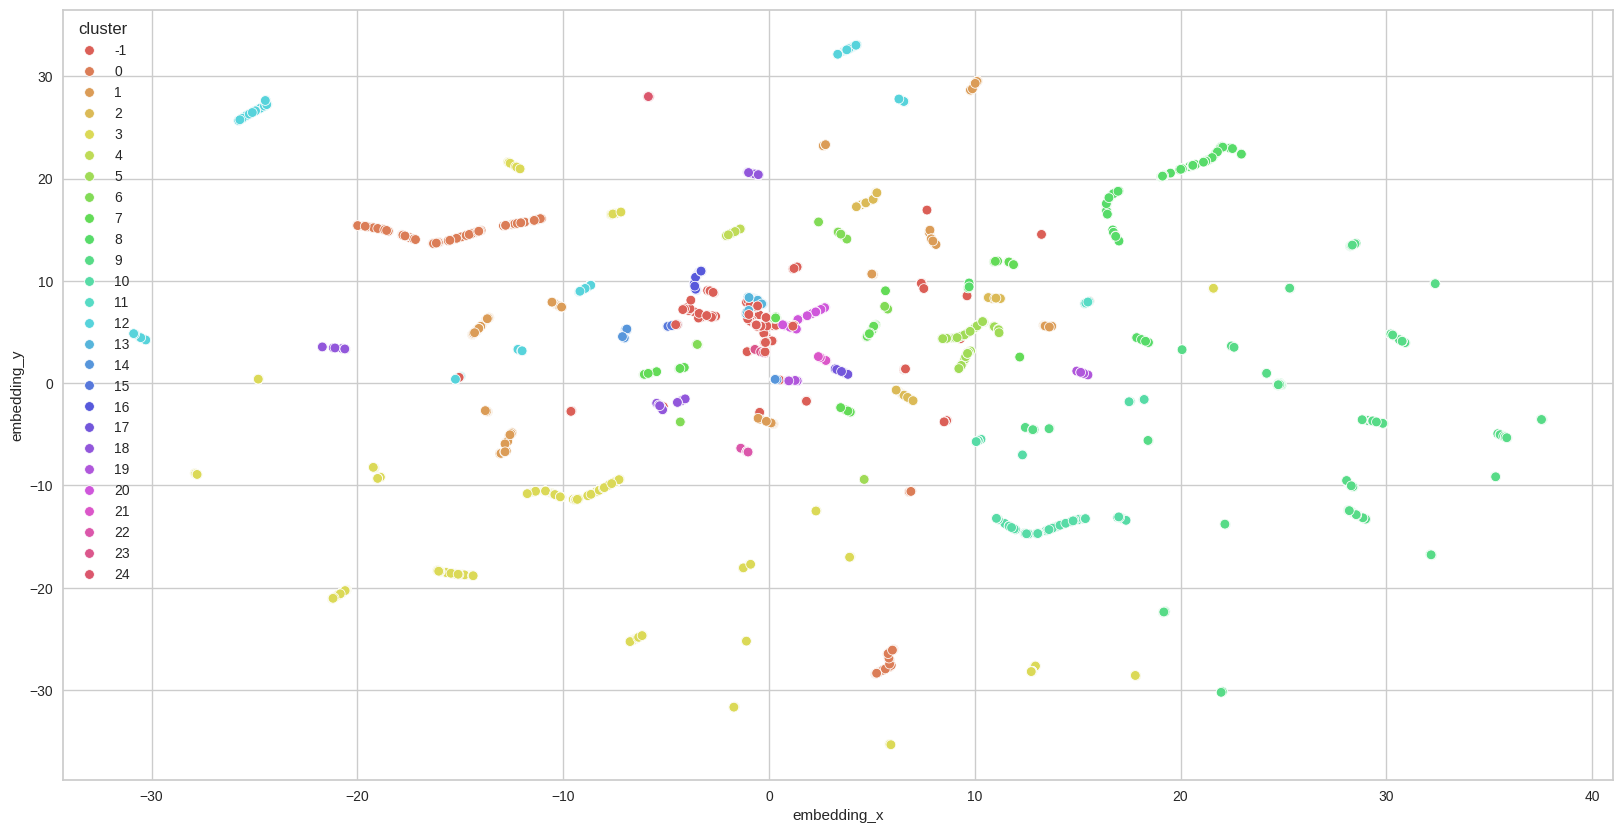

In [79]:
# plot UMAP
fig = plt.figure(figsize=(20,10))
sns.scatterplot(x='embedding_x',y='embedding_y', hue = 'cluster', palette = sns.color_palette('hls', n_colors=len(df['cluster'].unique())), data=df)

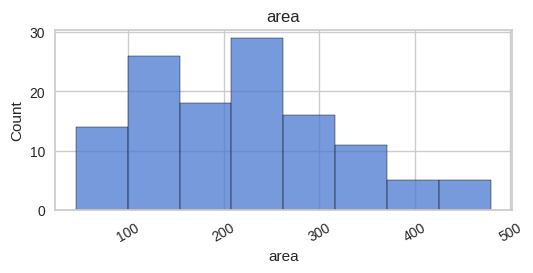

In [26]:
columns_features = ['area']
sns.set_palette('muted')
LAYOUT_PALETTE = 'muted'

utils.plot_matrix(
    data=df.loc[df['cluster'] == -1], 
    columns_features=columns_features, 
    n_rows = 10, 
    n_cols = 4, 
    figsize=(20, 25), 
    plot = sns.histplot, 
    loop_feature = 'x' ,
    label=False)

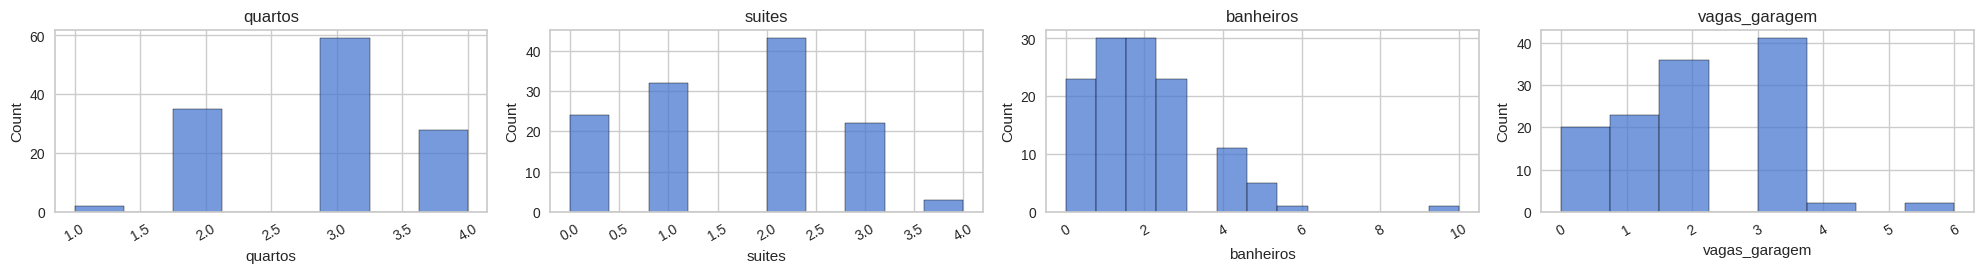

In [23]:
columns_features = ['quartos', 'suites','banheiros', 'vagas_garagem' ]
sns.set_palette('muted')
LAYOUT_PALETTE = 'muted'

utils.plot_matrix(
    data=df.loc[df['cluster'] == -1], 
    columns_features=columns_features, 
    n_rows = 10, 
    n_cols = 4, 
    figsize=(20, 25), 
    plot = sns.histplot, 
    loop_feature = 'x' ,
    label=False)

In [24]:
df.loc[df['cluster'] == -1][features]

,area,quartos,suites,banheiros,vagas_garagem
48,129.0,3,2,1,1
96,113.0,2,1,3,2
261,273.0,4,2,2,4
263,83.0,2,2,2,2
297,255.0,3,3,1,3
...,...,...,...,...,...
7674,359.0,3,3,0,3
7723,70.0,2,2,0,1
7780,192.0,3,1,2,3
7795,142.0,3,2,1,0


## Define Model

In [82]:
utils.save_picked_file(file=dbscan_model, name='dbscan_model')